# A novel deep learning based approach for identifying bird species.

In [1]:
import os 

for dirpath, dirnames, filenames in os.walk(r"C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 4 directories and 2 images in C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset
There are 3 directories and 0 images in C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\archive
There are 70 directories and 0 images in C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\archive\test
There are 0 directories and 2 images in C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\archive\test\SNOW GOOSE
There are 0 directories and 5 images in C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\archive\test\SNOW PARTRIDGE
There are 0 directories and 5 images in C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\archive\test\SNOWY PLOVER
There are 0 directories and 5 images in C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-

In [2]:
num_of_bird_groups = len(os.listdir(r"C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\train"))
num_of_bird_groups

525

In [3]:
import pathlib 
import numpy as np

data_dir = pathlib.Path(r"C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'AFRICAN PYGMY GOOSE'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN DIPPER' 'AMERICAN FLAMINGO'
 'AMERICAN GOLDFINCH' 'AMERICAN KESTREL' 'AMERICAN PIPIT'
 'AMERICAN REDSTART' 'AMERICAN ROBIN' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'ASIAN GREEN BEE EATER' 'ASIAN OPENBILL STORK' 'AUCKLAND SHAQ'
 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT' 'AZARAS SPINETAIL'
 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER' 'AZURE TIT'
 'BAIKAL TEAL' 'BALD EAGLE

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def view_random_image(target_dir, target_class):
  target_folder = os.path.join(target_dir, target_class)
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(os.path.join(target_folder ,random_image[0]))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


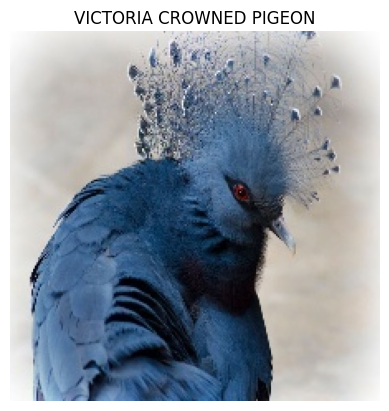

In [5]:
img = view_random_image(target_dir = r"C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\train",
                        target_class = "VICTORIA CROWNED PIGEON") 

In [6]:
import tensorflow as tf
img.shape

(224, 224, 3)

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


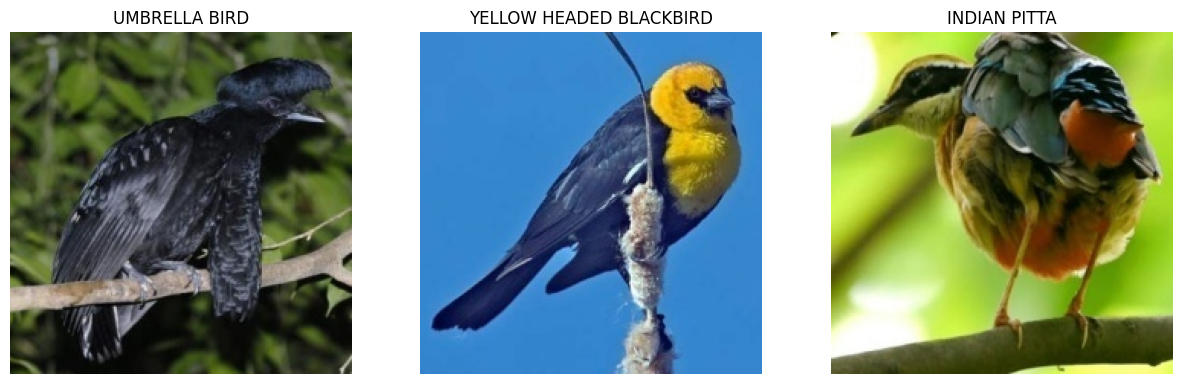

In [7]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
image1 = view_random_image(r"C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\train", "UMBRELLA BIRD")
plt.subplot(1,3,2)
image2 = view_random_image(r"C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\train", "YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
image3 = view_random_image(r"C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\train", "INDIAN PITTA")

In [8]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [9]:
train_dir = r"C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\train"
test_dir = r"C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\test"
val_dir = r"C:\Users\PAVAN KALYAN\OneDrive\Documents\IV-II\Major Project\Selected\Bird Species\bird dataset\valid"

In [10]:

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)


train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")


Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [11]:

base_model = tf.keras.applications.InceptionV3(include_top= False,)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape =(300,300,3), name = "input-layer")

x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

outputs = tf.keras.layers.Dense(525, activation = "softmax", name = "output-layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])


history = model_0.fit(train_data,epochs=10,steps_per_epoch = len(train_data),validation_data = val_data,validation_steps = int(0.25*len(val_data)),)

Shape after passing inputs through base model: (None, 8, 8, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
Epoch 1/10
2645/2645 [==============================] - 1493s 564ms/step - loss: 10.6181 - accuracy: 0.4779 - val_loss: 7.3023 - val_accuracy: 0.6281
Epoch 2/10
2645/2645 [==============================] - 1501s 568ms/step - loss: 7.6826 - accuracy: 0.6710 - val_loss: 6.4773 - val_accuracy: 0.7250
Epoch 3/10
2645/2645 [==============================] - 1538s 581ms/step - loss: 6.5240 - accuracy: 0.7335 - val_loss: 6.9348 - val_accuracy: 0.7141
Epoch 4/10
2645/2645 [==============================] - 1847s 698ms/step - loss: 5.7207 - accuracy: 0.7710 - val_loss: 7.0429 - val_accuracy: 0.7734
Epoch 5/10
2645/2645 [==============================] - 1671s 632ms/step - loss: 4.9207 - accuracy: 0.8030 - val_loss: 5.5236 - val_accuracy: 0.8000
Epoch 6/10
2645/2645 [==============================] - 1472s 556ms/step - loss: 4.3641 - accuracy: 0.8242 - val_loss: 6.3143 - val_accurac

In [12]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 300, 300, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 525)               1075725   
                                                                 
Total params: 22,878,509
Trainable params: 1,075,725
Non-trainable params: 21,802,784
_________________________________________________________________


In [13]:
model_0.evaluate(test_data)

83/83 [==============================] - 42s 512ms/step - loss: 5.5901 - accuracy: 0.8293


[5.590115547180176, 0.8293333053588867]

In [2]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["Validation Loss"]

  accuracy = history.history["Accuracy"]
  val_accuracy = history.history["Validation Accuracy"]

  epochs = range(len(history.history["loss"]))


  plt.plot(epochs, loss, label = "Training Loss")
  plt.plot(epochs, val_loss, label = "Validation Loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()


  plt.figure() 
  plt.plot(epochs, accuracy, label = "Training Accuracy")
  plt.plot(epochs, val_accuracy, label = "Validation Accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

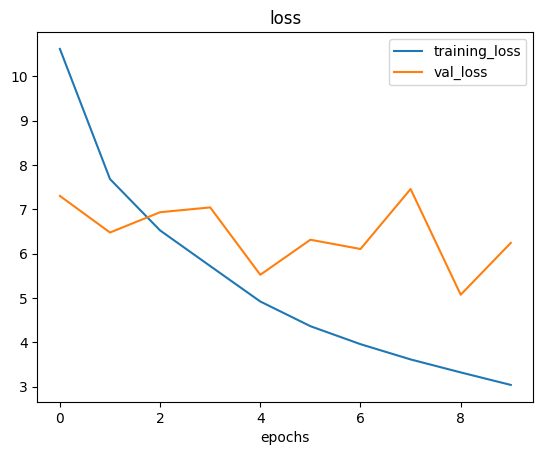

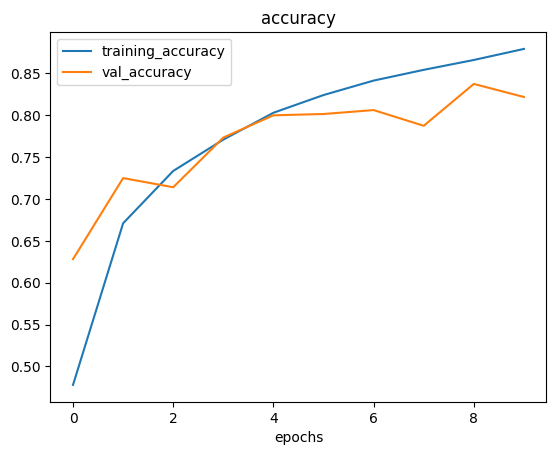

In [15]:
plot_loss_curves(history)

In [16]:


base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), # when fine-tuning you typically want to lower lr by 10x
                 metrics = ["accuracy"] )

In [17]:

for layer_number, layer in enumerate(model_0.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 conv2d False
2 batch_normalization False
3 activation False
4 conv2d_1 False
5 batch_normalization_1 False
6 activation_1 False
7 conv2d_2 False
8 batch_normalization_2 False
9 activation_2 False
10 max_pooling2d False
11 conv2d_3 False
12 batch_normalization_3 False
13 activation_3 False
14 conv2d_4 False
15 batch_normalization_4 False
16 activation_4 False
17 max_pooling2d_1 False
18 conv2d_8 False
19 batch_normalization_8 False
20 activation_8 False
21 conv2d_6 False
22 conv2d_9 False
23 batch_normalization_6 False
24 batch_normalization_9 False
25 activation_6 False
26 activation_9 False
27 average_pooling2d False
28 conv2d_5 False
29 conv2d_7 False
30 conv2d_10 False
31 conv2d_11 False
32 batch_normalization_5 False
33 batch_normalization_7 False
34 batch_normalization_10 False
35 batch_normalization_11 False
36 activation_5 False
37 activation_7 False
38 activation_10 False
39 activation_11 False
40 mixed0 False
41 conv2d_15 False
42 batch_normalization_15 False

In [18]:
print(len(model_0.trainable_variables))

3


In [19]:
initial_epochs = 10
fine_tune_epochs = initial_epochs + 1

history_2 = model_0.fit(train_data,
                       epochs = fine_tune_epochs,
                       validation_data = val_data,
                       validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 10/11
2645/2645 [==============================] - 1577s 595ms/step - loss: 0.5170 - accuracy: 0.9665 - val_loss: 3.0083 - val_accuracy: 0.8781
Epoch 11/11
2645/2645 [==============================] - 1925s 728ms/step - loss: 0.2537 - accuracy: 0.9794 - val_loss: 3.4238 - val_accuracy: 0.8766


In [20]:
model_0.evaluate(test_data)

83/83 [==============================] - 57s 683ms/step - loss: 2.5250 - accuracy: 0.9139


[2.524974822998047, 0.9139047861099243]

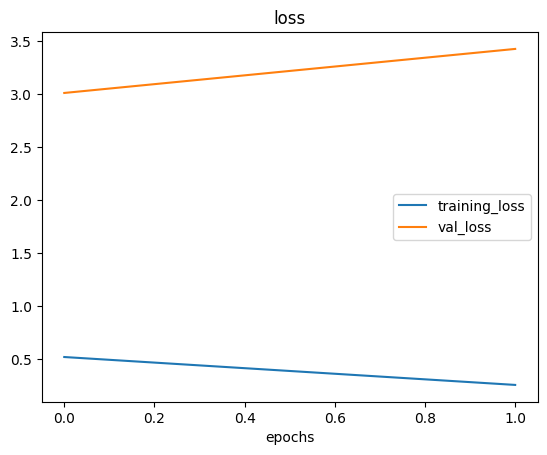

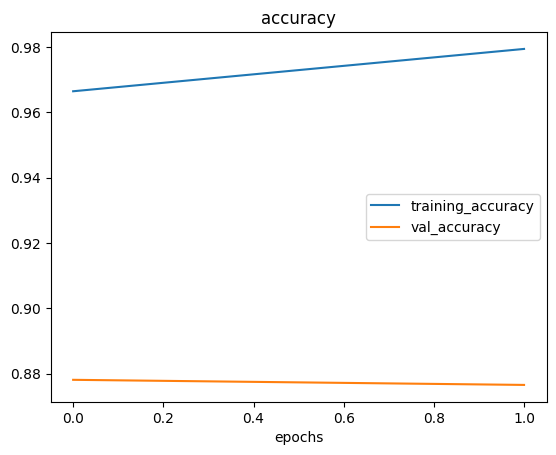

In [21]:
plot_loss_curves(history_2)

In [23]:
model_0.save("full_model.h5")